# Data Analysis -Elon Musk Project(laptop price prediction)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#reading the cleaned csv file 

In [3]:
data=pd.read_csv(r"C:\Users\DELL\Desktop\Intership\cleaned_data\cleaned_data.csv")

In [4]:
df=data.copy()

In [5]:
#it is preferred to have a copy of original dataset inorder to not have any changes in it 
#and copied dataset can be used for further analysis

In [6]:
df.head()

,Brand,Model_Name,Processor_name,ram,Processor_generation,OS,storage,rating,price,screen_size_inch
0,Lenovo,LenovoIdeaPad3Corei311th,Intel Core i3,8 GB DDR4,11th Gen,64 bit Windows 11,256 GB SSD35.56,4.2,"₹36,990",14
1,Lenovo,LenovoIdeaPad3Corei311th,Intel Core i3,8 GB DDR4,11th Gen,64 bit Windows 11,512 GB SSD39.62,4.2,"₹39,990",15.6
2,ASUS,ASUSVivoBook15(2022)Corei3,Intel Core i3,8 GB DDR4,10th Gen,64 bit Windows 11,512 GB SSD39.62,4.3,"₹32,990",15.6
3,HP,HPPavilionRyzen5HexaCore,AMD Ryzen 5 Hexa Core,8 GB DDR4,NaN,64 bit Windows 10,512 GB SSD39.62,4.4,"₹49,990",15.6
4,ASUS,ASUSTUFGamingF15Corei5,Intel Core i5,8 GB DDR4,10th Gen,Windows 11,512 GB SSD39.62,4.4,"₹49,990",15.6


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423 entries, 0 to 422
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Brand                 423 non-null    object 
 1   Model_Name            423 non-null    object 
 2   Processor_name        413 non-null    object 
 3   ram                   419 non-null    object 
 4   Processor_generation  253 non-null    object 
 5   OS                    423 non-null    object 
 6   storage               423 non-null    object 
 7   rating                423 non-null    float64
 8   price                 423 non-null    object 
 9   screen_size_inch      423 non-null    object 
dtypes: float64(1), object(9)
memory usage: 33.2+ KB


In [8]:
# Changing the dtype of screensize
df["screen_size_inch"] = df["screen_size_inch"].apply(lambda x : x.split(" ")[1])


In [9]:
df["screen_size_inch"].value_counts()


15.6      234
14         92
13.3       18
16         15
17.3       10
16.1        8
&           8
11.6        8
13.4        5
16.2        5
14.1        4
15          4
13.6        3
14.2        2
Office      1
11th        1
10th        1
13          1
14.96       1
13.5        1
16.6        1
Name: screen_size_inch, dtype: int64

In [10]:
# most of the screens have 15.6 inch size
#17.3 inch is the highest which holds only 10 laptops
#there is one distict name office,10th,11th it is further changed to inch

In [11]:
df["screen_size_inch"] = df["screen_size_inch"].apply(lambda x : x.replace("Office", "14").replace("11th", "15.6").replace("10th", "15.6").replace("&", "15.6"))


In [12]:
df["screen_size_inch"].value_counts()


15.6     244
14        93
13.3      18
16        15
17.3      10
11.6       8
16.1       8
13.4       5
16.2       5
14.1       4
15         4
13.6       3
14.2       2
13         1
14.96      1
13.5       1
16.6       1
Name: screen_size_inch, dtype: int64

In [13]:
df["screen_size_inch"] = df["screen_size_inch"].astype("float64")


In [14]:
df.dtypes


Brand                    object
Model_Name               object
Processor_name           object
ram                      object
Processor_generation     object
OS                       object
storage                  object
rating                  float64
price                    object
screen_size_inch        float64
dtype: object

In [15]:
df["price"] = df["price"].apply(lambda x :x.replace("₹","").replace(",","")).astype("float64")


In [16]:
def filter_ram(s):
    try:
        s = s.split("GB")
        return s[0]
    except Exception as e:
        pass
def filter_ram_type(s):
    try:
        s = s.split("GB")
        return s[1]
    except Exception as e:
        pass

In [17]:
df["ram_capacity"] = df["ram"].apply(filter_ram)


In [18]:
df["ram_type"] = df["ram"].apply(filter_ram_type)


In [19]:
df = df.drop(["ram"], axis=1)


In [20]:
df["storage"] = df["storage"].apply(lambda x : x.split("SSD")[0].split("&")[-1])


In [21]:
df["storage"].value_counts()


512 GB                                                                                     217
1 TB                                                                                        74
256 GB                                                                                      61
1 TB HDD|256 GB                                                                             23
1 TB HDD39.62                                                                                9
2 TB                                                                                         6
29.46                                                                                        5
128 GB                                                                                       4
35.56                                                                                        3
 512GB                                                                                       3
1 TB HDD35.56                                     

In [22]:
df["storage"] = df["storage"].apply(lambda x : x.replace(": 10th Generation Intel Core i3-1005G1","512 GB").replace(": 11th Generation Intel Core i5-1135G7","512 GB").replace("Student IncludedStylish Thin and Light Laptop without Optical Disk DriveIntel Core i5","512 GB").replace("S 2021","512 GB"))


In [23]:
df["storage"].value_counts()


512 GB                219
1 TB                   74
256 GB                 61
1 TB HDD|256 GB        23
1 TB HDD39.62           9
2 TB                    6
29.46                   5
128 GB                  4
 512GB                  3
35.56                   3
1 TB HDD35.56           3
1 TB HDD|128 GB         2
 1TB + 256GB            2
 256GB                  2
1 TB HDD|512 GB         2
39.62                   1
512 GB                  1
 512 GB                 1
256 GB HDD|256 GB       1
1 TB HDD35.81           1
Name: storage, dtype: int64

In [24]:
df["storage"] = df["storage"].apply(lambda x:x.split("HDD")[-1].split("+")[-1].split("|")[-1].replace("39.62","512 GB"))


In [25]:
df["storage"].value_counts()


512 GB      231
256 GB       85
1 TB         74
35.56         6
128 GB        6
2 TB          6
29.46         5
 256GB        4
 512GB        3
 512 GB       1
512 GB        1
35.81         1
Name: storage, dtype: int64

In [26]:
df["storage"] = df["storage"].apply(lambda x:x.replace("35.56","512 GB").replace("29.46","512 GB").replace("35.81","512 GB"))


In [27]:
df["storage"].value_counts()


512 GB      243
256 GB       85
1 TB         74
128 GB        6
2 TB          6
 256GB        4
 512GB        3
 512 GB       1
512 GB        1
Name: storage, dtype: int64

In [28]:
df["storage"] = df["storage"].apply(lambda x :x.split("GB")[0].split("TB")[0])


In [29]:
df["storage"] = df["storage"].str.strip()


In [30]:
df["storage"] = df["storage"].astype("int64")


In [31]:
df.dtypes


Brand                    object
Model_Name               object
Processor_name           object
Processor_generation     object
OS                       object
storage                   int64
rating                  float64
price                   float64
screen_size_inch        float64
ram_capacity             object
ram_type                 object
dtype: object

In [32]:
df["ram_type"].dtype


dtype('O')

In [33]:
df.nunique()


Brand                    16
Model_Name              280
Processor_name           40
Processor_generation     11
OS                       20
storage                   5
rating                   18
price                   251
screen_size_inch         17
ram_capacity              9
ram_type                  7
dtype: int64

In [63]:
def data_type(df):
    cat_var=[]
    num_var=[]
    for i in df.columns:
        if df[i].dtype=="O":
            print(i,": Object type")
            cat_var.append(i)
        else:
            print(i,": Number Type")
            num_var.append(i)
    df.drop_duplicates()
    return cat_var, num_var

In [64]:
cat_var, num_var = data_type(df)


Brand : Object type
Model_Name : Object type
Processor_name : Object type
Processor_generation : Object type
OS : Object type
storage : Number Type
rating : Number Type
price : Number Type
screen_size_inch : Number Type
ram_capacity : Object type
ram_type : Object type


# Univariate analysis

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

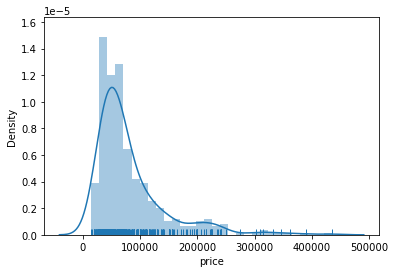

In [65]:
sns.distplot(df['price'],rug=True)


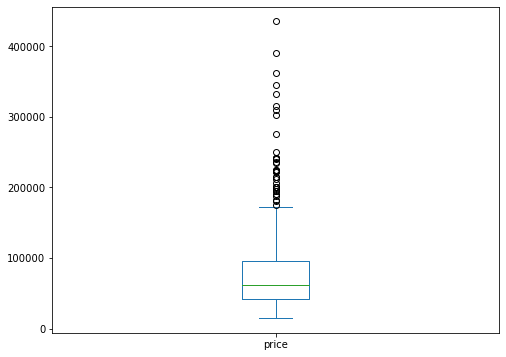

In [66]:
df.price.plot(kind = 'box', figsize = (8,6))
plt.show()


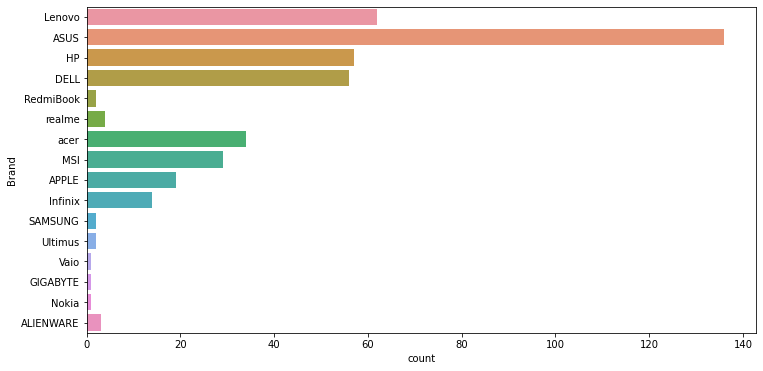

In [67]:

plt.figure(figsize = (12,6))
sns.countplot(data = df,y = 'Brand')
plt.yticks(fontsize= 10)
plt.xticks(fontsize= 10)
#style.use ('ggplot')
plt.show()


Text(0, 0.5, 'Count')

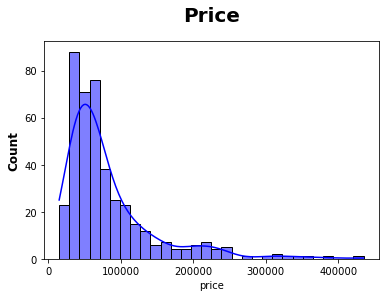

In [68]:
sns.histplot(df.price, kde=True, color='b')
plt.title("Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)

<AxesSubplot:>

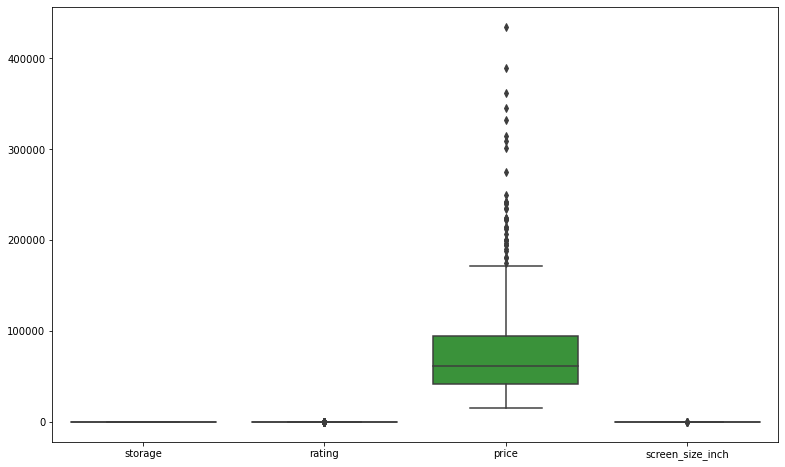

In [69]:
plt.figure(figsize=(13,8))
sns.boxplot(data=df)

In [70]:
df.head()


,Brand,Model_Name,Processor_name,Processor_generation,OS,storage,rating,price,screen_size_inch,ram_capacity,ram_type
0,Lenovo,LenovoIdeaPad3Corei311th,Intel Core i3,11th Gen,64 bit Windows 11,256,4.2,36990.0,14.0,8,DDR4
1,Lenovo,LenovoIdeaPad3Corei311th,Intel Core i3,11th Gen,64 bit Windows 11,512,4.2,39990.0,15.6,8,DDR4
2,ASUS,ASUSVivoBook15(2022)Corei3,Intel Core i3,10th Gen,64 bit Windows 11,512,4.3,32990.0,15.6,8,DDR4
3,HP,HPPavilionRyzen5HexaCore,AMD Ryzen 5 Hexa Core,11th Gen,64 bit Windows 10,512,4.4,49990.0,15.6,8,DDR4
4,ASUS,ASUSTUFGamingF15Corei5,Intel Core i5,10th Gen,Windows 11,512,4.4,49990.0,15.6,8,DDR4


In [71]:
df.isna().mean()


Brand                   0.0
Model_Name              0.0
Processor_name          0.0
Processor_generation    0.0
OS                      0.0
storage                 0.0
rating                  0.0
price                   0.0
screen_size_inch        0.0
ram_capacity            0.0
ram_type                0.0
dtype: float64

In [72]:
df.Processor_name = df.Processor_name.fillna(df.Processor_name.mode()[0])


In [73]:
df.Processor_generation = df.Processor_generation.fillna(df.Processor_generation.mode()[0])
df.ram_capacity = df.ram_capacity.fillna(df.ram_capacity.mode()[0])
df.ram_type = df.ram_type.fillna(df.ram_type.mode()[0])


In [74]:
df.Processor_generation.value_counts()


11th Gen     288
12th Gen      66
10th Gen      53
4th Gen        4
9th Gen        3
8th Gen        3
5th Gen        2
3rd Gen        1
11th Gen       1
10th Gen       1
7th Gen        1
Name: Processor_generation, dtype: int64

In [75]:
df.Processor_generation = df.Processor_generation.apply(lambda x : x.replace(": 10th Generation Intel Core i3-1005G1","10th Gen"))


In [76]:
# 64 bit Windows 11, 64 bit Windows 10, Windows 11, Mac OS,Windows 10, Chrome
# dt["operating_system"]
df.isna().mean()

Brand                   0.0
Model_Name              0.0
Processor_name          0.0
Processor_generation    0.0
OS                      0.0
storage                 0.0
rating                  0.0
price                   0.0
screen_size_inch        0.0
ram_capacity            0.0
ram_type                0.0
dtype: float64

In [77]:
df["storage"].value_counts()


512    248
256     89
1       74
128      6
2        6
Name: storage, dtype: int64

In [79]:
dt = {}
for feature in cat_var:
    labels_ordered=df.groupby([feature])['price'].mean().sort_values().index
    labels_ordered={k:i for i, k in enumerate(labels_ordered,0)}
    dt[feature] = labels_ordered
    df[feature]=df[feature].map(labels_ordered)

# Creating a Model 

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423 entries, 0 to 422
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Brand                 423 non-null    int64  
 1   Model_Name            423 non-null    int64  
 2   Processor_name        423 non-null    int64  
 3   Processor_generation  423 non-null    int64  
 4   OS                    423 non-null    int64  
 5   storage               423 non-null    int64  
 6   rating                423 non-null    float64
 7   price                 423 non-null    float64
 8   screen_size_inch      423 non-null    float64
 9   ram_capacity          423 non-null    int64  
 10  ram_type              423 non-null    int64  
dtypes: float64(3), int64(8)
memory usage: 36.5 KB


In [81]:
X = df.drop(columns=["Model_Name", "price", "rating"])


In [82]:
y = df.price


In [83]:
# train test split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


# Training - Splitting 

In [84]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)


In [85]:
X_train

,Brand,Processor_name,Processor_generation,OS,storage,screen_size_inch,ram_capacity,ram_type
415,12,27,6,17,1,16.0,7,4
360,6,31,6,14,512,15.6,7,2
402,11,31,9,17,512,15.6,7,4
325,8,37,6,17,1,15.6,7,2
376,12,8,6,14,256,15.6,3,2
...,...,...,...,...,...,...,...,...
343,6,2,6,14,512,15.6,0,2
359,11,19,6,14,512,14.0,3,2
323,6,8,4,14,512,15.6,0,2
280,12,31,6,16,512,15.6,7,2


In [86]:
y_train

415    171990.0
360    109990.0
402    221774.0
325    124990.0
376     36990.0
         ...   
343     27490.0
359     55690.0
323     33499.0
280     56990.0
8       46990.0
Name: price, Length: 317, dtype: float64

In [87]:
X_test

,Brand,Processor_name,Processor_generation,OS,storage,screen_size_inch,ram_capacity,ram_type
136,7,19,6,16,512,14.0,7,1
381,8,23,5,14,128,15.6,3,2
244,6,27,6,14,512,14.0,3,2
152,14,32,6,19,256,13.3,3,5
23,6,7,6,17,512,15.6,3,2
...,...,...,...,...,...,...,...,...
418,11,19,9,17,512,13.3,7,4
27,8,14,6,17,512,15.6,3,2
254,12,19,4,14,512,15.6,3,2
357,9,20,2,15,512,15.6,3,2


In [88]:
y_test

136     64999.0
381     74590.0
244     55600.0
152    121990.0
23      35590.0
         ...   
418     76590.0
27      47990.0
254     51990.0
357     64590.0
259     41090.0
Name: price, Length: 106, dtype: float64

# Initializing

In [89]:
lr = LinearRegression()


In [90]:
lr.fit(X_train, y_train)


LinearRegression()

In [91]:
LinearRegression()


LinearRegression()

In [92]:
lr.score(X_test, y_test)

0.7668000896622608

# Algorithm used - Random Forest Regressor

In [93]:
from sklearn.ensemble import RandomForestRegressor


In [94]:
rf = RandomForestRegressor(n_estimators=100,oob_score=True, bootstrap=True,)


In [95]:
rf.fit(X_train, y_train)


RandomForestRegressor(oob_score=True)

In [96]:
RandomForestRegressor(oob_score=True)


RandomForestRegressor(oob_score=True)

In [97]:
rf.score(X_test, y_test)


0.8778567446674006

In [98]:
from sklearn.ensemble import AdaBoostRegressor


In [99]:
adb = AdaBoostRegressor()


In [100]:
adb.fit(X_train, y_train)


AdaBoostRegressor()

In [101]:
AdaBoostRegressor()

AdaBoostRegressor()

In [102]:
adb.score(X_test, y_test)


0.7606745008392434

In [103]:
#using pickle module we can store the data in a file/database
#we can oreserve data, transport data  

In [104]:
import pickle
pickle.dump(rf, open("model.pkl","wb"))

In [105]:
pickle.dump(rf, open("dictionary_map.pkl","wb"))
model = pickle.load(open("model.pkl", "rb"))
model.predict([[7,19,6,16,512,14.0,7,1]])


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([75184.8])

In [106]:
rf.score(X_train, y_train), rf.score(X_test, y_test)

(0.9750338481529741, 0.8778567446674006)

In [107]:
rf = RandomForestRegressor(n_estimators=100,ccp_alpha=0.2, oob_score=True, max_samples=2, min_samples_leaf=1, min_samples_split=2)


In [108]:
rf.fit(X_train,y_train)


RandomForestRegressor(ccp_alpha=0.2, max_samples=2, oob_score=True)

In [109]:
df["price"].value_counts()

36990.0     9
59990.0     9
79990.0     8
38990.0     6
109990.0    6
           ..
44700.0     1
190890.0    1
174990.0    1
118990.0    1
23490.0     1
Name: price, Length: 251, dtype: int64

In [110]:
df["Processor_generation"].value_counts()

6     288
9      66
4      53
2       4
8       3
5       3
7       2
0       1
3       1
1       1
10      1
Name: Processor_generation, dtype: int64